# **CUSTOMER SEGMENTATION BY RFM MODEL**

## I. Business Understanding

<div style="border: 2px solid  gray;">


The company now wants to boost its business by focusing on different strategies for different customer groups. Hence, it is important to divide customers into specific groups based on certain factors. The task is to find those factors and categorize customers into specific groups

    
Customer segmentation is the process of dividing a company's customers into different groups or segments based on different customer attributes. The process of customer segmentation is based on finding differences between customer behavior or characteristics.

The main goals and benefits of customer segmentation:

* **Increasing revenue:** This is the most obvious goal of any customer segmentation task
* **Understanding customers:** One of the business models that is increasingly popular is “know your customer - KYC”, segmenting customers will help a lot for this model.
* **Marketing:** The most obvious benefit of customer segmentation is the ability to effectively focus marketing efforts. If a company knows the different segments of its customer base, it can come up with better marketing campaigns tailored specifically for that segment. A good segmentation model allows for a better understanding of customer requirements and thus increases the chances of success of any marketing campaign developed by the organization.

* **Place the Right Product** A good customer segmentation strategy can also help a company develop or offer new products, or a group of products together as a form of offering combine.
* **Find potential customer segments:** Find customer segments that may be missing to identify untapped customer segments by focusing on marketing campaigns or business development new.

### Summary


#### 1. RFM model represents customer value:

Since our dataset is limited to sales history and does not include anonymized information about customers, we will use an RFM-based model. The RFM model takes a customer's transactions and computes three important information properties about each customer:
* **Recency**: The value of how recently a customer made a purchase
* **Frequency**: Frequency of customer transactions
* **Monetary value**: The amount (or pounds in ASM post) of all the transactions that the customer has made

#### 2. Clustering:
The most obvious method to perform customer segmentation is to use unsupervised Machine Learning methods like clustering. The simplest method is to collect as much data about the customer as possible in the form of features or attributes and then find the different clusters that can be obtained from that data. Finally, we can find out the characteristics of customer segments by analyzing the characteristics of the clusters.
</div>

## II. EDA

### 1. Data And Package Import

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Ecommerce/RFM Analysis

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Ecommerce/RFM Analysis


In [ ]:
#data cleaning
import numpy as np
import pandas as pd
import datetime
import math

#data visualization
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import plotly as py
import plotly.graph_objs as go

#palette
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')

#datapreprocessing + clustering
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from scipy.stats import skew, norm, probplot, boxcox

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

For this task we have differente data sources, each one describing a specific topic related to e-commerce sales. The files are:

    clean_customers_df.csv
    clean_orders_df.csv
    clean_payments_df.csv
    
The relationship between these files are described on this <a href='https://github.com/longbui23/Ecommerce-Statistical-Analysis-and-Customer-Segmentation/blob/main/Data/OriginalDatasets/readme.md'>documentation</a>. So let's read the datasets.

In [ ]:
customer_df = pd.read_csv("../Data/CleanData/clean_customer_df.csv")
customer_df.head()

,Unnamed: 0,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
orders_df = pd.read_csv("../Data/CleanData/clean_orders_df.csv")
orders_df.head()

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15.000000000,2017-10-04 19:55:00.000000000,2017-10-10 21:25:13.000000000,2017-10-18 00:00:00
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27.000000000,2018-07-26 14:31:00.000000000,2018-08-07 15:27:45.000000000,2018-08-13 00:00:00
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23.000000000,2018-08-08 13:50:00.000000000,2018-08-17 18:06:29.000000000,2018-09-04 00:00:00
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59.000000000,2017-11-22 13:39:59.000000000,2017-12-02 00:28:42.000000000,2017-12-15 00:00:00
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29.000000000,2018-02-14 19:46:34.000000000,2018-02-16 18:17:02.000000000,2018-02-26 00:00:00


In [ ]:
payments_df = pd.read_csv("../Data/CleanData/clean_order_payments_df.csv")
payments_df.head()

,Unnamed: 0,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Let's merge these datasets into one for further conveniences.

In [ ]:
cust_order = customer_df.merge(orders_df, on='customer_id', how='left')
cust_order_payment = cust_order.merge(payments_df, on='order_id', how='left')
cust_order_payment.head()

,Unnamed: 0_x,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,Unnamed: 0_y,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Unnamed: 0,payment_sequential,payment_type,payment_installments,payment_value
0,0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,88492,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12.000000000,2017-05-23 10:47:57.000000000,2017-05-25 10:35:35.000000000,2017-06-05 00:00:00,19778.0,1.0,credit_card,2.0,146.87
1,1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,90418,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32.000000000,2018-01-15 17:14:59.000000000,2018-01-29 12:41:19.000000000,2018-02-06 00:00:00,33639.0,1.0,credit_card,8.0,335.48
2,2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,22557,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10.000000000,2018-06-11 14:31:00.000000000,2018-06-14 17:58:51.000000000,2018-06-13 00:00:00,73071.0,1.0,credit_card,7.0,157.73
3,3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,32180,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19.000000000,2018-03-27 23:22:42.000000000,2018-03-28 16:04:25.000000000,2018-04-10 00:00:00,6981.0,1.0,credit_card,1.0,173.30
4,4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,69902,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09.000000000,2018-07-30 15:16:00.000000000,2018-08-09 20:55:48.000000000,2018-08-15 00:00:00,82770.0,1.0,credit_card,8.0,252.25


In [ ]:
# Changing the data type for date columns
timestamp_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                  'order_estimated_delivery_date']

for col in timestamp_cols:
    cust_order_payment[col] = pd.to_datetime(cust_order_payment[col])

#datetime summary
dt_sum = pd.DataFrame({})

for col in timestamp_cols:
    dt_sum[col] = cust_order_payment[col].describe()

#display
dt_sum

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_estimated_delivery_date
count,103887,103887,103887,103887
mean,2017-12-29 21:42:16.455100160,2017-12-30 07:59:44.320045568,2018-01-02 00:59:56.716840704,2018-01-22 16:50:25.625920512
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-01 13:56:38.551555782,2016-09-30 00:00:00
25%,2017-09-10 08:02:59.500000,2017-09-10 18:12:44.500000,2017-09-12 20:54:46,2017-09-29 00:00:00
50%,2018-01-17 14:07:07,2018-01-17 18:19:22,2018-01-20 00:48:28,2018-02-14 00:00:00
75%,2018-05-03 18:35:46.500000,2018-05-04 03:31:38,2018-05-07 14:06:00,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-10-17 07:05:09.260513090,2018-10-14 11:45:24.551555782,2018-11-12 00:00:00


In [ ]:
cust_order_payment.describe()

,Unnamed: 0_x,customer_zip_code_prefix,Unnamed: 0_y,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_estimated_delivery_date,Unnamed: 0,payment_sequential,payment_installments,payment_value
count,103887.000000,103887.000000,103887.000000,103887,103887,103887,103887,103886.00000,103886.000000,103886.000000,103886.000000
mean,49701.126041,35072.353490,49715.865460,2017-12-29 21:42:16.455100160,2017-12-30 07:59:44.320045568,2018-01-02 00:59:56.716840704,2018-01-22 16:50:25.625920512,51942.50000,1.092679,2.853349,154.100380
min,0.000000,1003.000000,0.000000,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-01 13:56:38.551555782,2016-09-30 00:00:00,0.00000,1.000000,0.000000,0.000000
25%,24859.500000,11367.500000,24862.500000,2017-09-10 08:02:59.500000,2017-09-10 18:12:44.500000,2017-09-12 20:54:46,2017-09-29 00:00:00,25971.25000,1.000000,1.000000,56.790000
50%,49741.000000,24360.000000,49660.000000,2018-01-17 14:07:07,2018-01-17 18:19:22,2018-01-20 00:48:28,2018-02-14 00:00:00,51942.50000,1.000000,1.000000,100.000000
75%,74507.500000,58418.000000,74623.500000,2018-05-03 18:35:46.500000,2018-05-04 03:31:38,2018-05-07 14:06:00,2018-05-25 00:00:00,77913.75000,1.000000,4.000000,171.837500
max,99440.000000,99990.000000,99440.000000,2018-10-17 17:30:18,2018-10-17 07:05:09.260513090,2018-10-14 11:45:24.551555782,2018-11-12 00:00:00,103885.00000,29.000000,24.000000,13664.080000
std,28695.013489,29743.416343,28716.594867,NaN,NaN,NaN,NaN,29989.44937,0.706584,2.687051,217.494064


### 2.Recency value

 #### 2.1) Distribution Visualization

As in the introduction we mentioned the RFM model, now we are going to create the Recency variable, we need to decide the reference date for the analysis. Usually, we will use the last trading day plus one day. Then, we will construct the recency variable which is the number of days before the reference date when the customer last purchased.

For example: The last day that a customer's purchase order appears is the 10th day so they will take 10 + 1 = 11. Then we will subtract the last day from which each customer purchases from 11. Assuming the last time that customer A made a purchase was on day 5, and the last time that customer B made a purchase was on day 7, we would have a Recency for customer A which would be 11 - 5 = 6, and a Recency for customer B is 11 - 7 = 4

In [ ]:
rfm_df['order_purchase_timestamp'] = pd.to_datetime(rfm_df['order_purchase_timestamp'])

#create rfm dataframe + max datetime by customer
rfm_df = cust_order_payment.groupby(by='customer_unique_id')[['order_purchase_timestamp']].max()

#most recent date
rfm_df['recent_date'] = rfm_df['order_purchase_timestamp'].dt.date.max()

#recency creation
rfm_df['recency'] = rfm_df['recent_date'] - rfm_df['order_purchase_timestamp'].dt.date

#convert to only date
rfm_df['recency'] = pd.to_datetime(rfm_df['recency'])
rfm_df['recency'] = rfm_df['recency'].dt.days + 1

#re-organize df
rfm_df.drop(columns=['order_purchase_timestamp','recent_date'],inplace=True)
rfm_df.head()

TypeError: <class 'datetime.timedelta'> is not convertible to datetime, at position 0

In [ ]:
fig = plt.figure(figsize=(20,7))

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(rfm_df[['recency']])

#Kernel Density plot
fig1 = fig.add_subplot(121)
sns.distplot(rfm_df[['recency']], fit=norm)

fig1.set_title('Recency Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
fig1.set_xlabel('Recency')
fig1.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

From the graph above, we can see that the distribution of Recency is skewed, with a peak on the left and a long tail on the right. It deviates from the normal distribution and tends to be positive.

#### 2.2) Log Transformation

In [ ]:
#drop 0
rfm_df = rfm_df[rfm_df['recency']!=0]

#log transformation
rfm_df['recency_log']=rfm_df['recency'].apply(lambda x: np.log(x))

#Standard Scaler to normalize data
scaler = StandardScaler()

rfm_df['recency_log'] = scaler.fit_transform(rfm_df[['recency_log']])

#data summary
rfm_df['recency_log'].describe().transpose()

In [ ]:
fig = plt.figure(figsize=(20,7))

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(rfm_df[['recency_log']])

#Kernel Density plot
fig1 = fig.add_subplot(121)
sns.distplot(rfm_df[['recency_log']], fit=norm)

fig1.set_title('Recency log distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
fig1.set_xlabel('Recency (log)')
fig1.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

 ### 3) Frequency Value


 #### 3.1) Distribution Visualization

In [ ]:
cust_order_payment.head()

In [ ]:
#create monentary value
payment_df = cust_order_payment.groupby('customer_unique_id').agg({'payment_value':'sum'})
payment_df.rename(columns = {'payment_value':'monentary'}, inplace=True)

#merge into main df
rfm_df = rfm_df.merge(payment_df, on='customer_unique_id', how='left')
rfm_df

In [ ]:
fig = plt.figure(figsize=(20,7))

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(rfm_df[['monentary']])

#Kernel Density plot
fig1 = fig.add_subplot(121)
sns.distplot(rfm_df[['monentary']], fit=norm)

fig1.set_title('Monentary distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
fig1.set_xlabel('Monentary')
fig1.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

From the graph above, we can see that the distribution of Monentary is skewed, with a peak on the left and a long tail on the right. It deviates from the normal distribution and tends to be positive.

#### 3.2) Log Transformation

In [ ]:
#drop 0
rfm_df = rfm_df[rfm_df['monentary']!=0]

#log transformation
rfm_df['monentary_log']=rfm_df['monentary'].apply(lambda x: np.log(x))
rfm_df.head()

#Standard Scaler to normalize data
rfm_df['monentary_log'] = scaler.fit_transform(rfm_df[['monentary_log']])

#data summary
rfm_df['monentary_log'].describe().transpose()

In [ ]:
fig = plt.figure(figsize=(20,7))

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(rfm_df[['monentary_log']])

#Kernel Density plot
fig1 = fig.add_subplot(121)
sns.distplot(rfm_df[['monentary_log']], fit=norm)

fig1.set_title('Monentary log distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
fig1.set_xlabel('Monentary (log)')
fig1.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 4) Monentary Value

#### 4.1) Distribution Transformation

In [ ]:
cust_order_payment.head()

In [ ]:
#frequency value
freq_df = cust_order_payment.groupby('customer_unique_id').aggregate({'order_id':'count'}).rename(columns={'order_id':'frequency'})

#merge into main df
rfm_df = rfm_df.merge(freq_df, on='customer_unique_id', how='left')
rfm_df

In [ ]:
fig = plt.figure(figsize=(20,7))

#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(rfm_df[['frequency']])

#Kernel Density plot
fig1 = fig.add_subplot(121)
sns.distplot(rfm_df[['frequency']], fit=norm)

fig1.set_title('Frequency distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
fig1.set_xlabel('Frequency value')
fig1.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

We should inspect customer loyalty rate since very low for each product. We could dig deeper into return rate by using NLP.

## III. Model Building

### 1) Regression Plot

KeyError: 'monentary'

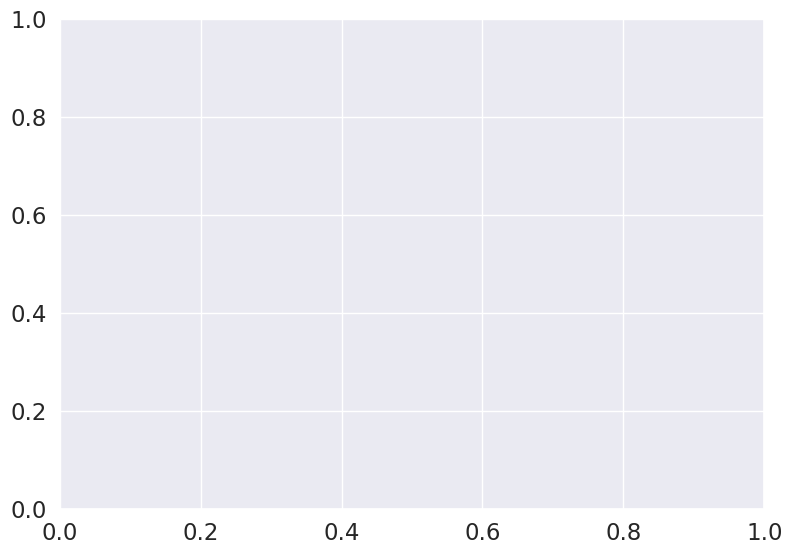

In [26]:
#reg suplot
fig = plt.figure(figsize=(20,14))

f1 = fig.add_subplot(221)
sns.regplot(x='recency',y='monentary', data=rfm_df)

f1 = fig.add_subplot(222)
sns.regplot(x='frequency',y='monentary', data=rfm_df)

f1 = fig.add_subplot(223)
sns.regplot(x='recency_log',y='monentary_log', data=rfm_df)

f1 = fig.add_subplot(224)
sns.regplot(x='frequency',y='monentary_log', data=rfm_df)

#3d visualization
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

#plot axis
xs = rfm_df.recency_log
ys = rfm_df.frequency
zs = rfm_df.monentary_log
ax.scatter(xs,ys,zs, s=5)

#set axis
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monentary')

#display
plt.show()

No correlation between monentary and recency while there is a positive correlation between Frequency & Monenetary.

### 2) Modeling KMeans


##### **Elbow Method:**

Use the Elbow method to find the optimal number of clusters. The idea behind the elbow method is to determine the value of k at which the bend begins to increase fastest. If k increases, the distortion of the clusters will decrease, because the samples will be close to the cluster centroid.

This method considers the percentage of variance explained as a function of the number of clusters. More precisely, if we plot the percentage of variance explained by the clusters against the number of clusters, the first clusters will add a lot of information (which explains more of the variance), but at some point, marginal gain will decrease (Number of clusters increases, variance decreases), creating an angle in the graph, which will be the point of quantity selection for clusters, hence the "elbow criterion". The percentage of variance is explained as the ratio of the group variance to the total variance, also known as the F-test. A slight variation of this method plots the curvature of variance in the cluster

In [ ]:
#scale data
X_scaled = rfm_df[['monentary_log','recency_log','frequency']]

#int vars
cl = 50
corte = 0.1
feature_vector = ['monentary_log','recency_log','frequency']
anterior = 100000000000000
cost = []
K_best = cl

#loop over incremental clustering numbers
for k in range (1, cl+1):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    model = KMeans(
        n_clusters=k,
        init='k-means++', #'random',
        n_init=10,
        max_iter=300,
        tol=1e-04,
        random_state=101)

    #fit model
    model = model.fit(X_scaled)

    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = model.labels_

    # Sum of distances of samples to their closest cluster center
    interia = model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte): K_best = k - 1
    cost.append(interia)
    anterior = interia

#plot
plt.figure(figsize=(8, 6))
plt.scatter(range (1, cl+1), cost, c='red')
plt.show()

# Create a kmeans model with the best K.
print('The best K sugest: ',K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)

# Normalize data
model = model.fit(X_scaled)

# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
labels = model.labels_

#plt.scatter(X_scaled.iloc[:,0], X_scaled.iloc[:,1], c=model.labels_.astype(float))
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(121)
plt.scatter(x = X_scaled.iloc[:,1], y = X_scaled.iloc[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[1])
ax.set_ylabel(feature_vector[0])
ax = fig.add_subplot(122)
plt.scatter(x = X_scaled.iloc[:,2], y = X_scaled.iloc[:,0], c=model.labels_.astype(float))
ax.set_xlabel(feature_vector[2])
ax.set_ylabel(feature_vector[0])

plt.show()

### 3)Sillhoutte index

**Silhouette index: **

**Silhouette** analysis in Kmeans . clustering

Silhouette analysis can be used to study the distance between clusters, as a strategy to quantify the quality of clustering or clustering through visualizations to graph the degree of "group closeness". " of samples in clusters. Silhouette diagrams display a measure of how close each point in a cluster is to points in neighboring clusters and thus provide a way to visually evaluate parameters such as the number of clusters.

This analysis can also be applied to other clustering algorithms besides k-means.

The Silhouette coefficient has a range of [-1, 1], and is calculated by:
1. a(i) is the mean distance between sample x(i) and all other points in the same cluster.
2. b(i) from the next closest cluster is the average distance between sample x(i) and all samples in the nearest cluster.
3. s(i) is the difference between a(i) and b(i) divided by max(a(i), b(i)), as shown here:

\begin{align}
\text{s(i)} = \frac{b(i) - a(i)}{max\{a(i), b(i)\}}
\end{align}

Another way of writing the above formula:

\begin{align}
         \text{s}(i) = \left\{
         \begin{array}{cl}
         1 - a(i)/b(i), & \text{if } a(i) < b(i) \\
         0, & \text{if } a(i) = b(i) \\
         b(i)/a(i) - 1, & \text{if } a(i) > b(i)
         \end{array}
         \right.
     \end{align}

In there:
* If close to +1, it means that the sample is far from neighboring clusters.
* A high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
* If most of the objects have high values, then the clustering configuration is appropriate.
* If many points have low or negative values, the clustering configuration may have too many or too few clusters.
* A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters
* Negative values indicate that those samples may have been assigned to the wrong group.

K is considered bad when clusters have below-average Silhouette scores or there is large variation in the size of Silhouette cells. K is considered good when all cells have similar or not much different thickness, or in other words all cells have similar dimensions.

Although we must be aware that in some cases and situations we may sometimes have to discard the mathematical interpretation given by the algorithm and consider the business relevance of the result obtained.

Let's see how our data behaves for each of the K values (3, 5 and 7) in the Silhouette score of each cluster, along with the centroid of each cluster highlighted in the scatter plots, they We will cluster with 3 input variables amount_log, recency_log, frequency_log but will display on scatter in pairs (amount_log, recency_log) and (amount_log, frequency_log)

In [ ]:
#dict for cluster centers
cluster_centers = dict()

#loop through incremental number of clusters
for n_clusters in range(3,K_best+2,2):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X_scaled) + (n_clusters + 1) * 10])

    #int clusters
    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=101)
    cluster_labels = clusterer.fit_predict(X_scaled)

    #silhoutte vars
    silhouette_avg = silhouette_score(X = X_scaled, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })
    sample_silhouette_values = silhouette_samples(X = X_scaled, labels = cluster_labels)
    y_lower = 10

    #loop over clusters to check silhouette vars
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    #title
    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)

    #visualize centers + value points
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X_scaled.iloc[:, x], X_scaled.iloc[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    ax2.set_xlabel(feature_vector[x])
    ax2.set_ylabel(feature_vector[y])

    x = 2
    ax3.scatter(X_scaled.iloc[:, x], X_scaled.iloc[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    #centers
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    ax3.set_xlabel(feature_vector[x])
    ax3.set_ylabel(feature_vector[y])

    #subtitle
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    #dispay
    plt.show()

#### 4) Cluster Center

In [ ]:
#features
features = ['monentary',  'recency',  'frequency']

#loop over incremental clusters
for i in range(3,K_best+2,2):
    print("for {} clusters the silhouette score is {:1.2f}".format(i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(np.exp(cent_transformed),columns=features))
    print('-'*50)

In [ ]:
#assigning clusters labels to each data points
for i in range(3,8,2):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    rfm_df['clusters_{}'.format(i)] = kmeans.labels_

#display
rfm_df.head()

### 4) Cluster Insights

In [ ]:
#assigning clusters labels to each data points
for i in range(3,8,2):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X_scaled)
    rfm_df['clusters_{}'.format(i)] = kmeans.labels_

#display
rfm_df.head()

In [ ]:
rfm_df.to_csv('Data/rfm_df.csv')

 ## IV. Clusters Analysis

#### 1) 3 clusters

In [ ]:
#3 clusters
c3_0 = rfm_df[rfm_df['clusters_3'] == 0]
c3_1 = rfm_df[rfm_df['clusters_3'] == 1]
c3_2 = rfm_df[rfm_df['clusters_3'] == 2]

#5 clusters
c5_0 = rfm_df[rfm_df['clusters_5'] == 0]
c5_1 = rfm_df[rfm_df['clusters_5'] == 1]
c5_2 = rfm_df[rfm_df['clusters_5'] == 2]
c5_3 = rfm_df[rfm_df['clusters_5'] == 3]
c5_4 = rfm_df[rfm_df['clusters_5'] == 4]

#7 clusters
c7_0 = rfm_df[rfm_df['clusters_7'] == 0]
c7_1 = rfm_df[rfm_df['clusters_7'] == 1]
c7_2 = rfm_df[rfm_df['clusters_7'] == 2]
c7_3 = rfm_df[rfm_df['clusters_7'] == 3]
c7_4 = rfm_df[rfm_df['clusters_7'] == 4]
c7_5 = rfm_df[rfm_df['clusters_7'] == 5]
c7_6 = rfm_df[rfm_df['clusters_7'] == 6]

In [ ]:
rfm_df.groupby('clusters_3').agg({'monentary':'mean','recency':'mean','frequency':'mean'})

In [ ]:
#3 clusters
fig = plt.figure(figsize=(20,7))
ax1 = fig.add_subplot(131); sns.boxplot(data=c3_0[['frequency','recency_log','monentary_log']])
ax2 = fig.add_subplot(132); sns.boxplot(data=c3_1[['frequency','recency_log','monentary_log']])
ax3 = fig.add_subplot(133); sns.boxplot(data=c3_2[['frequency','recency_log','monentary_log']])

#add title
ax1.title.set_text("1st Cluster")
ax2.title.set_text("2nd Cluster")
ax3.title.set_text("3rd Cluster")

#display
plt.show()

### 2) 5 cluster analysis

In [ ]:
rfm_df.groupby('clusters_5').agg({'monentary':'mean','recency':'mean','frequency':'mean'})

In [ ]:
#3 clusters
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(231); sns.boxplot(data=c5_0[['frequency','recency_log','monentary_log']])
ax2 = fig.add_subplot(232); sns.boxplot(data=c5_1[['frequency','recency_log','monentary_log']])
ax3 = fig.add_subplot(233); sns.boxplot(data=c5_2[['frequency','recency_log','monentary_log']])
ax4 = fig.add_subplot(234); sns.boxplot(data=c5_3[['frequency','recency_log','monentary_log']])
ax5 = fig.add_subplot(235); sns.boxplot(data=c5_4[['frequency','recency_log','monentary_log']])

#add title
ax1.title.set_text("1st Cluster")
ax2.title.set_text("2nd Cluster")
ax3.title.set_text("3rd Cluster")
ax4.title.set_text("4th Cluster")
ax5.title.set_text("5th Cluster")

#display
plt.show()

### 3) 7 cluster Analysis

In [ ]:
rfm_df.groupby('clusters_7').agg({'monentary':'mean','recency':'mean','frequency':'mean'})

In [ ]:
#3 clusters
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(331); sns.boxplot(data=c7_0[['frequency','recency_log','monentary_log']])
ax2 = fig.add_subplot(332); sns.boxplot(data=c7_1[['frequency','recency_log','monentary_log']])
ax3 = fig.add_subplot(333); sns.boxplot(data=c7_2[['frequency','recency_log','monentary_log']])
ax4 = fig.add_subplot(334); sns.boxplot(data=c7_3[['frequency','recency_log','monentary_log']])
ax5 = fig.add_subplot(335); sns.boxplot(data=c7_4[['frequency','recency_log','monentary_log']])
ax6 = fig.add_subplot(336); sns.boxplot(data=c7_5[['frequency','recency_log','monentary_log']])
ax7 = fig.add_subplot(337); sns.boxplot(data=c7_6[['frequency','recency_log','monentary_log']])
#add title
ax1.title.set_text("1st Cluster")
ax2.title.set_text("2nd Cluster")
ax3.title.set_text("3rd Cluster")
ax4.title.set_text("4th Cluster")
ax5.title.set_text("5th Cluster")
ax6.title.set_text("6th Cluster")
ax7.title.set_text("7th Cluster")

#display
plt.show()